## Protein interaction network from STRING
- In this notebook you will apply the functions from the previous notebook to a protein-protein interaction network and a few more concepts and how to manipulate graphs in python.

In [184]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
#from custom import load_data as cf
import csv
from operator import itemgetter
import community 
import pandas as pd
#from custom import ecdf
from statsmodels.distributions.empirical_distribution import ECDF


warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading data¶

- Load the two csv files: 
        insulinnetwork_nodelist.csv (contains names on protein) 
        insulinnetwork_edgelist.cvs (contains the protein-protein interactions and an interaction scores)

`Pandas.read_csv` is the easiest way to do this.

In [107]:
nodes = pd.read_csv('data/insulinnetwork_nodelist.csv')
nodes = nodes.Name.values # returns array of the values in column "Name"

In [108]:
edges = pd.read_csv('data/insulinnetwork_edgelist.csv')
edges = [(row['Source'], row['Target']) for idx,row in edges.iterrows()] # make a pair for values in each row

Inspect our objects, then use them to construct a networkX graph:

In [109]:
print(nodes)
print('-------------')
print(edges)

['AKT1' 'EGF' 'GCG' 'IGF1' 'IGF1R' 'INS' 'INSR' 'IRS1' 'IRS2' 'PTPN1'
 'RPS6KB1']
-------------
[('IRS1', 'INSR'), ('INS', 'INSR'), ('PTPN1', 'IGF1R'), ('IGF1', 'IGF1R'), ('INS', 'IGF1R'), ('PTPN1', 'INSR'), ('IRS1', 'IGF1R'), ('INS', 'IRS1'), ('INSR', 'IGF1'), ('AKT1', 'INS'), ('IRS1', 'RPS6KB1'), ('INS', 'IGF1'), ('INS', 'IRS2'), ('INSR', 'IGF1R'), ('IRS2', 'IGF1R'), ('AKT1', 'RPS6KB1'), ('IRS1', 'IGF1'), ('IGF1', 'EGF'), ('INS', 'EGF'), ('INS', 'PTPN1'), ('PTPN1', 'IRS1'), ('INS', 'RPS6KB1'), ('AKT1', 'PTPN1'), ('GCG', 'INS'), ('IRS2', 'INSR'), ('IRS2', 'IGF1'), ('AKT1', 'IRS1'), ('IGF1', 'RPS6KB1'), ('AKT1', 'IGF1'), ('IGF1R', 'RPS6KB1'), ('IRS2', 'IRS1'), ('PTPN1', 'EGF'), ('INSR', 'RPS6KB1'), ('AKT1', 'INSR'), ('PTPN1', 'IGF1'), ('IRS2', 'PTPN1'), ('AKT1', 'EGF')]


In [110]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

### Exercise 1 - Basic information and drawing the network

The network has the protein Insulin as the center of the network. This means that all the other proteins are connected by edges to Insulin, but may also be connected to eachother. This is called an ego network.

Answer the question below by applying some of the commands you learned in the previous notebook. To get a high learning output you can type in the codes manually - to save time you can chose to copy-paste them instead. 

#### 1.a. Display the number of nodes and edges in the network

In [111]:
#%load solutions/ex2_1a.py
print("n_nodes : ", G.number_of_nodes())
print("n_edges : ", G.number_of_edges())

n_nodes :  11
n_edges :  37


#### 1.b. Print the first five edges in the network. Do 'AKT1' and 'EGF' interact?

In [112]:
#%load solutions/ex2_1b.py
print(list(G.edges)[:5])

'EGF' in G.neighbors('AKT1') # yes

[('AKT1', 'INS'), ('AKT1', 'RPS6KB1'), ('AKT1', 'PTPN1'), ('AKT1', 'IRS1'), ('AKT1', 'IGF1')]


True

#### 1.c. Draw network with labels

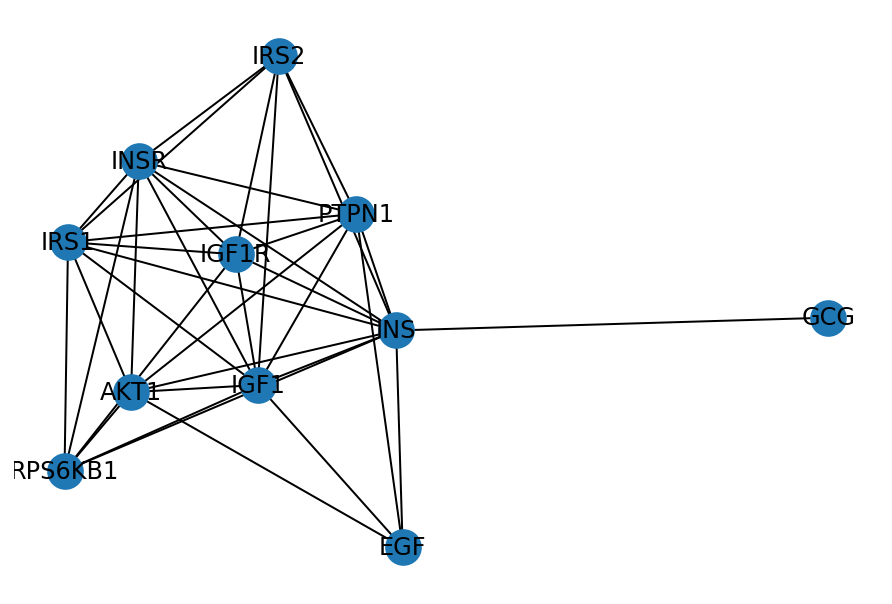

In [113]:
#%load solutions/ex2_1c.py
nx.draw(G, with_labels=True)

#### 1.d. List the neighbors of 'AKT1'

In [114]:
# %load solutions/ex2_1d.py
list(G.neighbors('AKT1'))

['INS', 'RPS6KB1', 'PTPN1', 'IRS1', 'IGF1', 'INSR', 'EGF']

#### 1.e. Draw subnetwork for the protein 'AKT1'

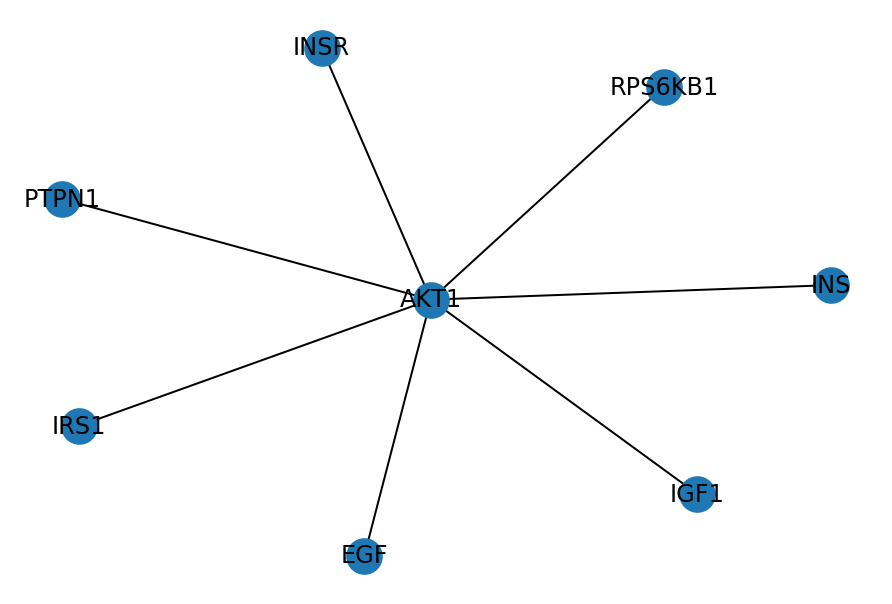

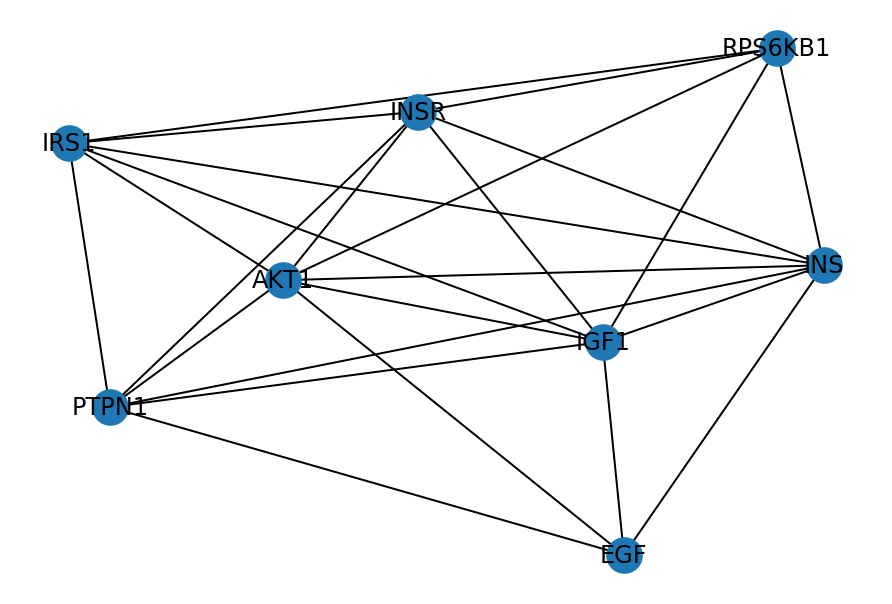

In [115]:
# %load solutions/ex2_1e.py

# we use the same function from 1_network_graphs_students
def extract_subgraph(G, node):
    new_G = nx.Graph()
    for neighbor in G.neighbors(node):
        new_G.add_edge(node, neighbor)
    return new_G

# then plot
akt1_G = extract_subgraph(G, 'AKT1')
nx.draw(akt1_G, with_labels=True)
plt.show()


# alternatively you could display the edges between AKT1's neighbors too
nx.draw(G.subgraph(akt1_G.nodes), with_labels=True)

#### 1.f. Rank top 5 proteins with the highest centrality 

In [116]:
# %load solutions/ex2_1f.py

# same approach as in the previous notebook
degs = sorted(G.degree, key=lambda item:item[1], reverse=True)
degs[:5]

[('INS', 10), ('IGF1', 9), ('INSR', 8), ('IRS1', 8), ('PTPN1', 8)]

#### 1.g. plot the network, but the size of the nodes proportional to their degree centrality (high centrality=bigger).

Use the arguments `nodelist` and `node_size` in `nx.draw`. The order have to match!

['AKT1', 'EGF', 'GCG', 'IGF1', 'IGF1R', 'INS', 'INSR', 'IRS1', 'IRS2', 'PTPN1', 'RPS6KB1']
[560, 320, 80, 720, 560, 800, 640, 640, 480, 640, 480]


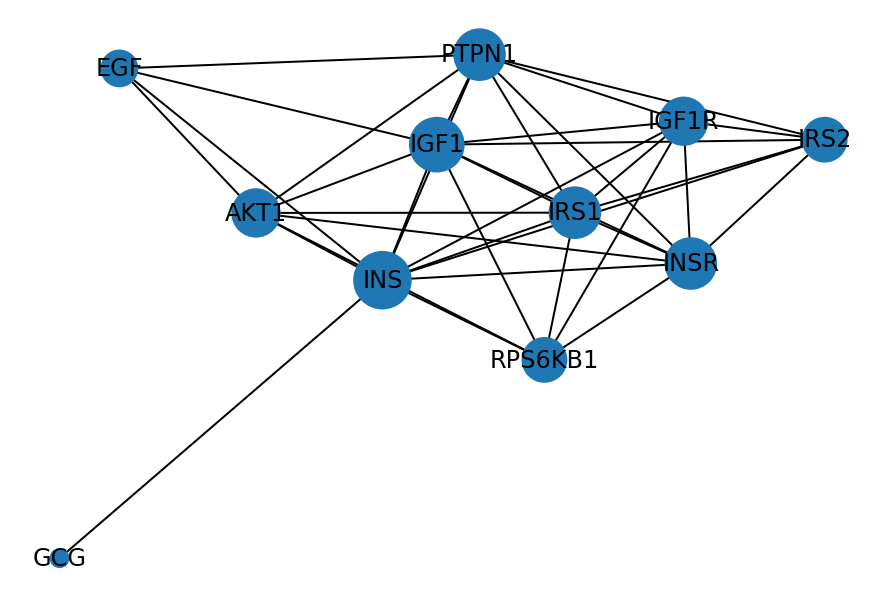

In [117]:
# load solutions/ex2_1g.py
scl = 80 # scaling factor for plotting

# we have to pass in a list of the 
d = dict(G.degree)

nl = list(d.keys()) #only the nodes
print(nl)

sz = [v*scl for v in d.values()] #only their degree (scaled up)
print(sz)

# now we have successfully split them into 2, with matching order
nx.draw(G, nodelist=nl, node_size=sz, with_labels=True)


We plot a empirical cumulative density function (ECDF), like in notebook 1. 

#### Exercise 2. What does the shape of the curve tell you? (answer in words)

Text(0.5, 1.0, 'Degree Centralities')

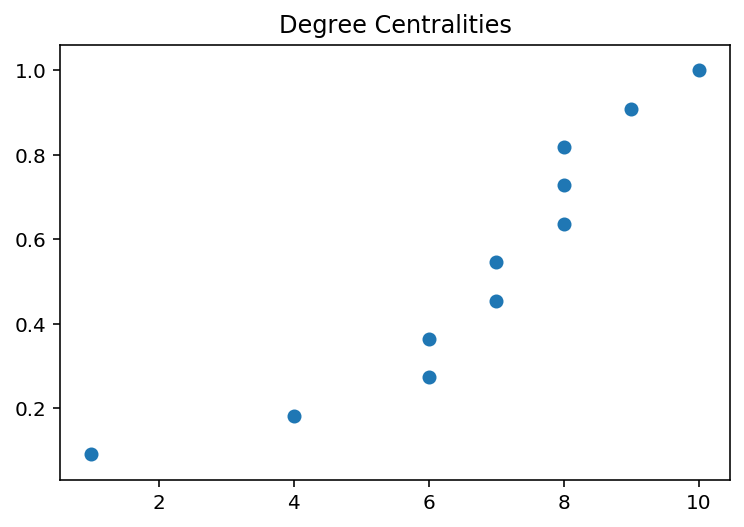

In [118]:
ecdf = ECDF(list(ds))
x,y = ecdf.x, ecdf.y

plt.scatter(x,y)
plt.title('Degree Centralities')

In [119]:
# %load solutions/ex2_2.py

# the vast majority of nodes have a high degree centrality (because it grows steepest from 6-8)


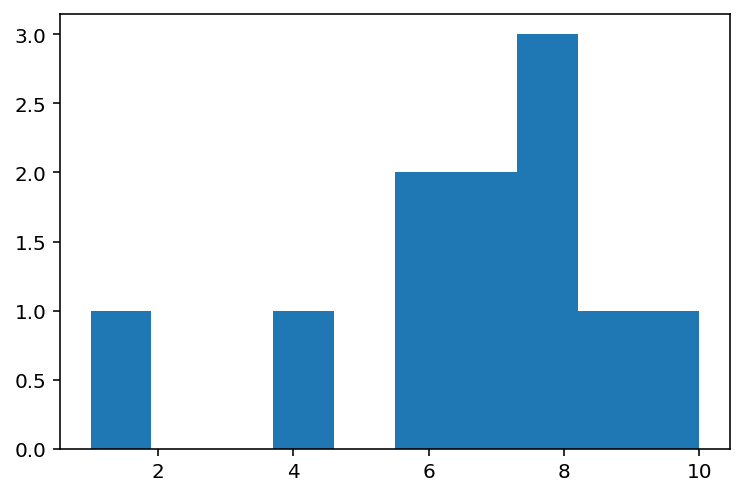

In [120]:
ds = dict(G.degree).values()
plt.hist(ds)
plt.show()

### Layout and directions


Now we wants to look at different layout and include directions on the edges.

First we draw a standard graph from our data:

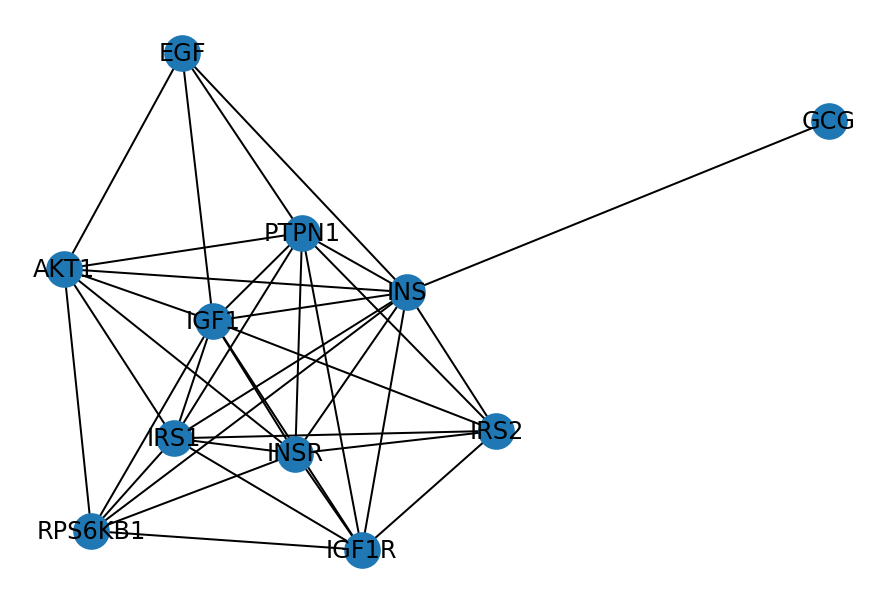

In [121]:
nx.draw(G, with_labels=True)
plt.show()

## Topological versus physical space
Most networks do not "exist" in physical space (e.g. a protein interaction network is an abstract network, while an air travel network has nodes fixed in physical space). But all networks can be said to exist in **topological** space, but the position of the nodes are only a feature of how *we* decide to plot them, not a property of the network itself. A certain layout may simplify the graph and make it easier to analyse and interpret, for example by plotting interacting nodes closer together. We can choose between dozens of different layout algorithms. Here we start by applying the Fruchterman Reingold layout algorithm, which is a force-directed layout.

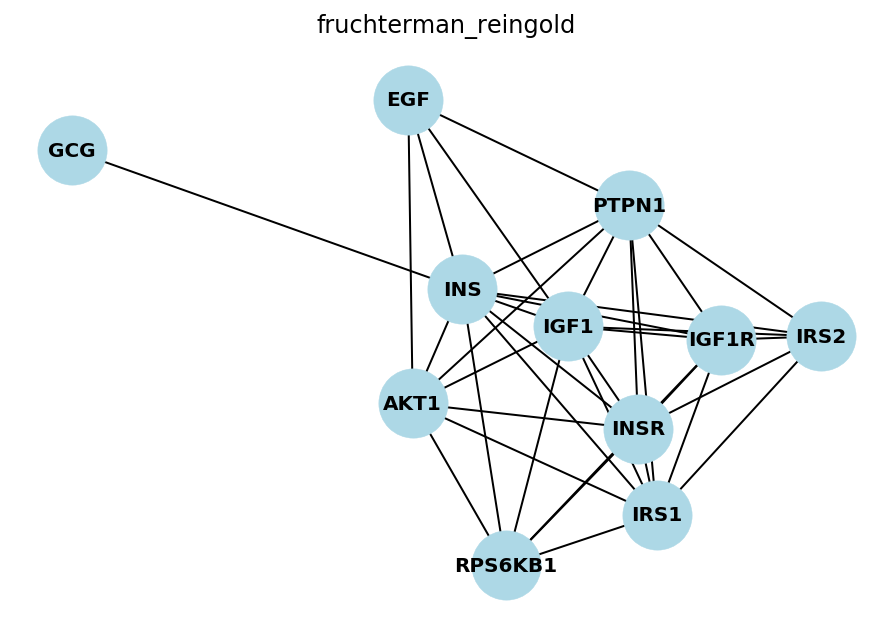

In [122]:
# Fruchterman Reingold
nx.draw(G, node_size=1200, node_color='lightblue',
    linewidths=0.25, font_size=10, font_weight='bold', with_labels=True, dpi=1000, pos=nx.fruchterman_reingold_layout(G))
plt.title("fruchterman_reingold")
plt.show()


You can also try out some of the other layout options in Networkx. Instead of Fruchterman_Reingold try circular, random and spectral.

In [123]:
def plot_graph(G, layout):
    nx.draw(G, node_size=1200, node_color='lightblue',
    linewidths=0.25, font_size=10, font_weight='bold', with_labels=True, dpi=1000, pos=layout(G))
    plt.title(layout.__name__)
    plt.show()

#### Exercise 3. try out the 3 different layouts from `nx`: circular, random and spectral.

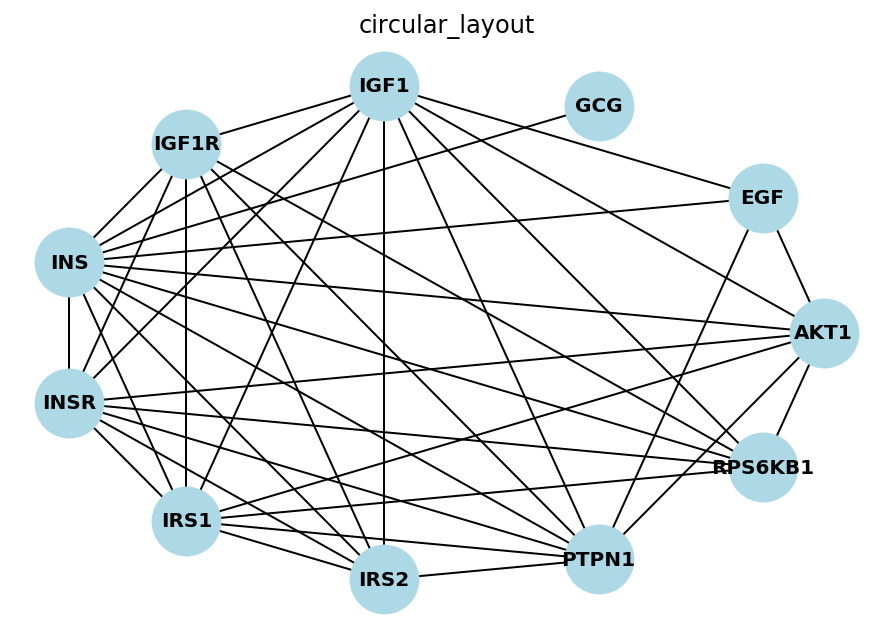

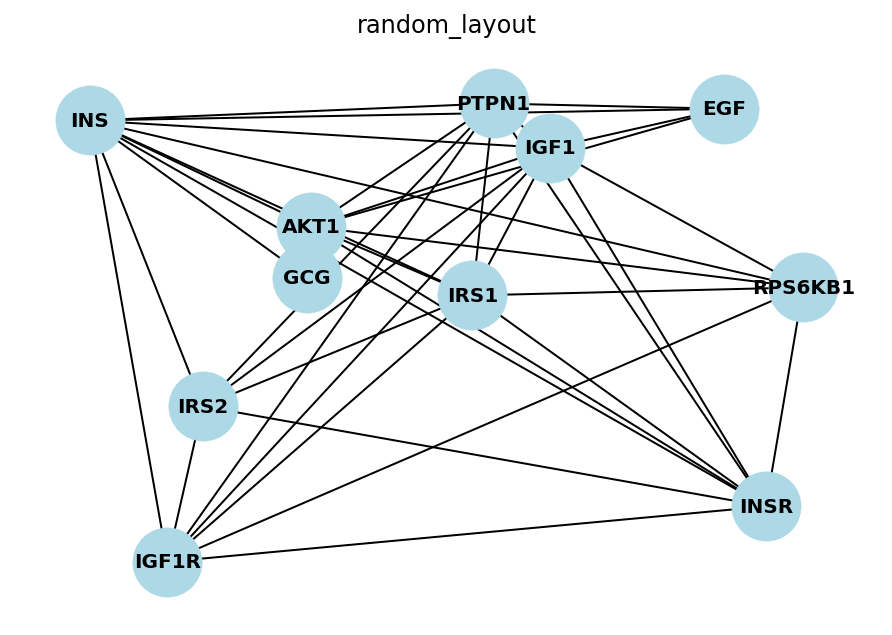

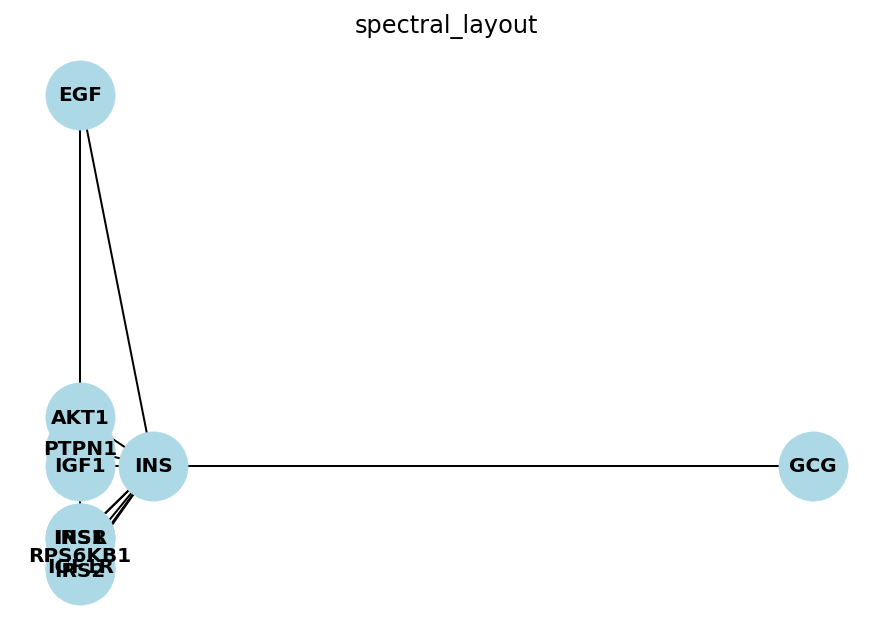

In [124]:
# load solutions/ex2_3.py
for layout in [nx.circular_layout, nx.random_layout, nx.spectral_layout]:
    plot_graph(G, layout)

In the graphs we have made so far, the direction of the edges were not given. If Mads was playing with Anna, then Anna was also playing with Mads. If instead we are dealing with situations were e.g. a protein activate another protein, we would like to add a direction on the relationship - going from the activating protein towards the activated protein. We do that by making a directed graph.

In networkx we use the command nx.DiGraph() to indicate that we now want to make a directed graph. 

Be aware that one edge can go in both directions, indicated by an arrow in both ends of the edge.

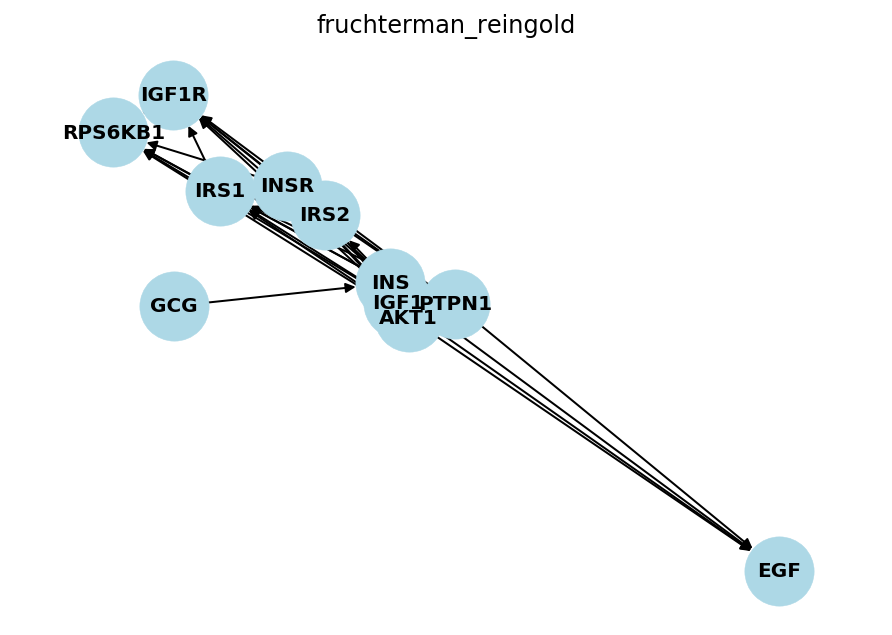

In [127]:
G = nx.DiGraph()

G.add_nodes_from(node_names)
G.add_edges_from(edges)

nx.draw(G, node_size=1200, node_color='lightblue',
    linewidths=0.25, font_size=10, font_weight='bold', with_labels=True, dpi=1000, pos=nx.fruchterman_reingold_layout(G))
plt.title("fruchterman_reingold")
plt.show()


#### Exercise 4: Now, try to make a directed network with a circular layout, green nodes and where the labels have a white font. 

Text(0.5, 1.0, 'circular')

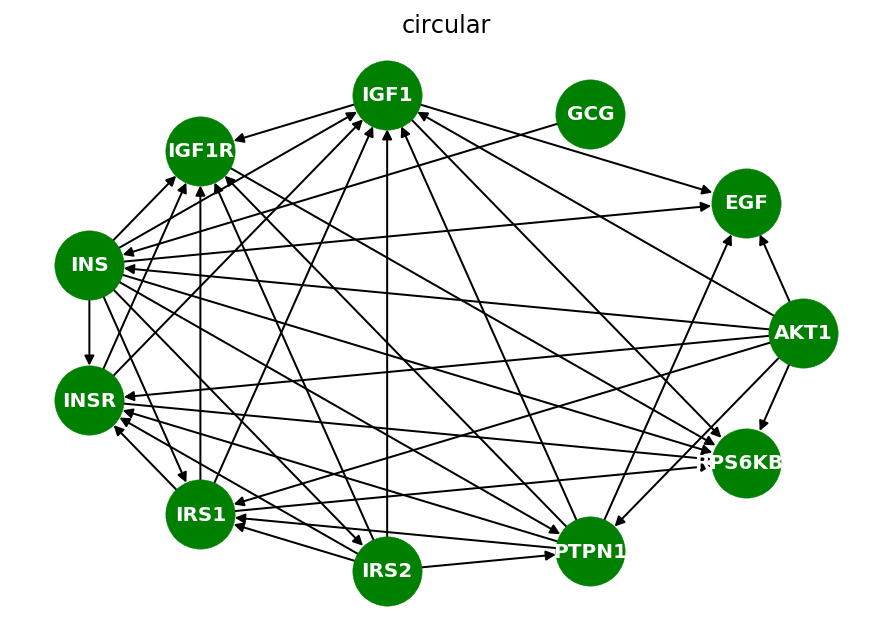

In [128]:
# %load solutions/ex2_4.py
nx.draw(G, node_size=1200, node_color='green', font_color='white',
    linewidths=0.25, font_size=10, font_weight='bold', with_labels=True, dpi=1000, pos=nx.circular_layout(G))
plt.title("circular")

###  Density, shortest paths and betweenness centrality

We will now introduce a few more terms related to graphs and show how networks can be represented as a plot instead of a graph. 

We start by calculation of the density of the network. Whereas the centrality is connected to the individual nodes, the density is related to the network and describes the portion of the potential connections in a network that are actual connections, i.e. how many of the potential edges are given in the network. For this network we will see that around one sixth of all the potential connections are actually given in the network.

#### Exercise 5. Calculate the density of G

In [183]:
# %load solutions/ex2_5.py
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
n_possible_edges = n_nodes**2 - n_nodes #subtract the diagonal because self-connections are not allowed
print(n_edges/n_possible_edges)

0.33636363636363636


Usually we find that there is a method that will do what we are looking for:

In [132]:
nx.density(G)

0.33636363636363636

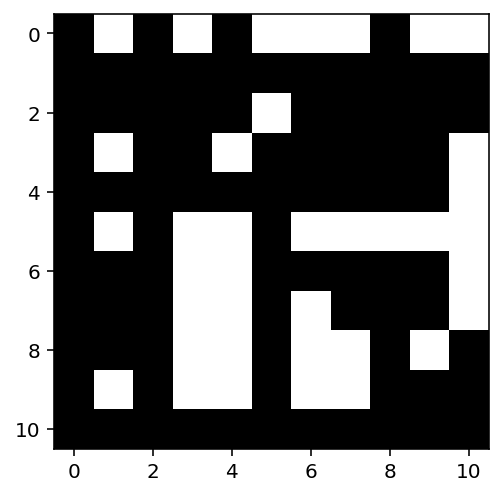

In [135]:
# do you agree that about 1/3 of the squares are white?
npg = nx.to_numpy_array(G)
plt.imshow(npg, cmap='gray')

We can also study the paths through the network. Often we will be most interested in finding the shortest path between two nodes, e.g. the shortest way that a signal can travel from one protein to another. E.g. the shortest path from GCG to EGF. 

In [136]:
nx.shortest_path(G, 'GCG', 'EGF')

['GCG', 'INS', 'EGF']

#### Exercise 6.  What happens if we take the shortest path the other way around - from EGF to GCG?

In [137]:
# %load solutions/ex2_6.py
nx.shortest_path(G, 'EGF', 'GCG') #supposed to throw an error for a DiGraph

NetworkXNoPath: No path between EGF and GCG.

#### Exercise 7. Use the code above to change the graph from a directed graph to an undirected graph and then try the same.

In [143]:
# %load solutions/ex2_7.py
# Transforming the graph into an undirected graph
G = nx.Graph(G)

# shortest path
nx.shortest_path(G, 'EGF', 'GCG')

['EGF', 'INS', 'GCG']

Select two arbitrary proteins of your own and find the shortest path between them.

In [145]:
G.nodes

NodeView(('AKT1', 'EGF', 'GCG', 'IGF1', 'IGF1R', 'INS', 'INSR', 'IRS1', 'IRS2', 'PTPN1', 'RPS6KB1'))

In [146]:
# Shortest path from __ to __
nx.shortest_path(G, 'INS', 'PTPN1')

['INS', 'PTPN1']

Knowing about the concepts of shortest path and centrality, we can now meassure the betweenness centrality. Betweenness centrality is a measure of centrality in a graph based on shortest paths. The betweenness centrality for each node (here proteins) is the number of shortest paths that pass through the node. 

You can say that the higher betweenness centrality a node has, the more control the node has over the network, because more information will pass through that node. In an ego-centeret network it is expected that the ego (here Insulin) will have the highest betweenness centrality. 

In [148]:
btws.keys()

dict_keys(['AKT1', 'EGF', 'GCG', 'IGF1', 'IGF1R', 'INS', 'INSR', 'IRS1', 'IRS2', 'PTPN1', 'RPS6KB1'])

<BarContainer object of 11 artists>

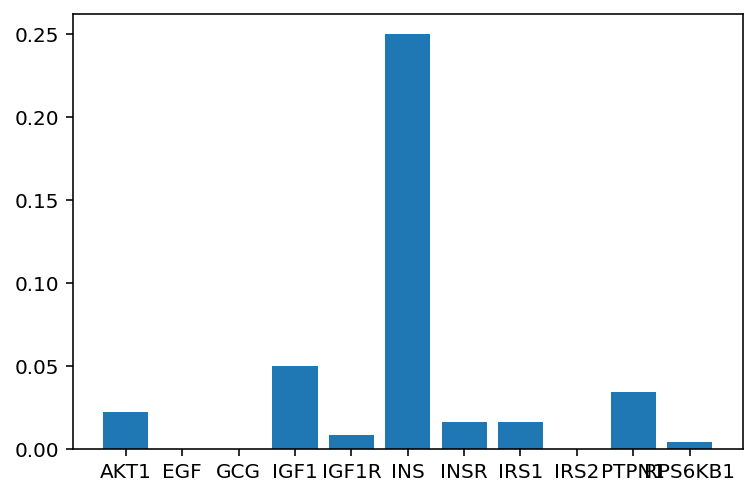

In [152]:
btws = nx.betweenness_centrality(G, normalized=True)
plt.bar(btws.keys(), btws.values())

#### Exercise 8.a. How many proteins is in the shortest path from GCG to EGF (excluding GCG and EGF)?

In [171]:
nx.shortest_path(G, 'GCG', 'EGF') 
# answer : 1

['GCG', 'INS', 'EGF']

#### Exercise 8.b. Which of the proteins in the insulin network has the second highest betweenness centrality?

In [172]:
# %load solutions/ex2_8.py

btws = nx.betweenness_centrality(G)

sorted(btws.items(), key=lambda d:d[1], reverse=True) #you've seen this before

# Answer:
# IGF1 is the second most central in terms of betweenness
# also very visible from the histogram

[('INS', 0.24962962962962967),
 ('IGF1', 0.04962962962962962),
 ('PTPN1', 0.034074074074074076),
 ('AKT1', 0.022222222222222223),
 ('INSR', 0.0162962962962963),
 ('IRS1', 0.0162962962962963),
 ('IGF1R', 0.00814814814814815),
 ('RPS6KB1', 0.003703703703703704),
 ('EGF', 0.0),
 ('GCG', 0.0),
 ('IRS2', 0.0)]

### Exercise 4 - Networks as matrices and arrays

We will end this notebook with demonstrating how a matrix plot of a network can be made. We use the nxviz function from MatrixPlot for this. 

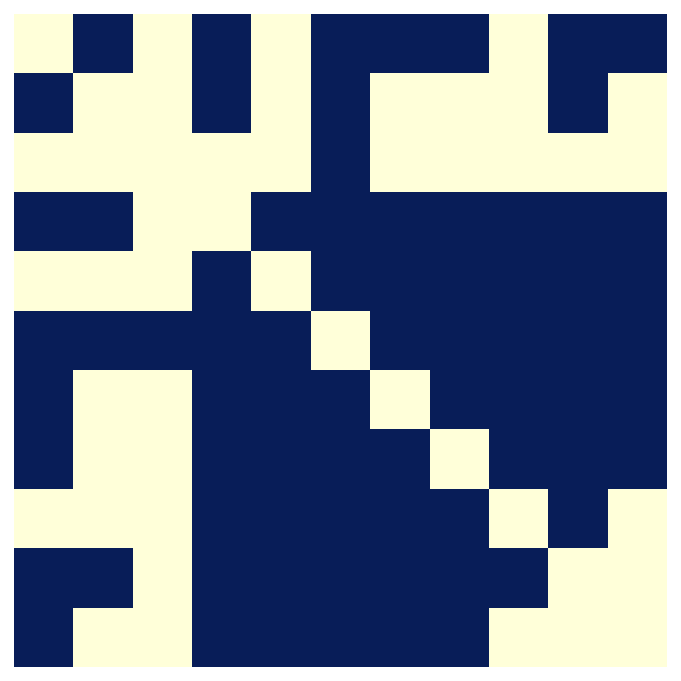

In [174]:
# can also use pyplot's imshow after converting to numpy array 
from nxviz import MatrixPlot
m = MatrixPlot(G)
m.draw()
plt.show()

Depending on whether or not your present network is given as a directed or undirected graph, the plot will have a symmetric or asymmetric structure. 

#### Exercise 9. Make a new Matrixplot, but with the directed graph

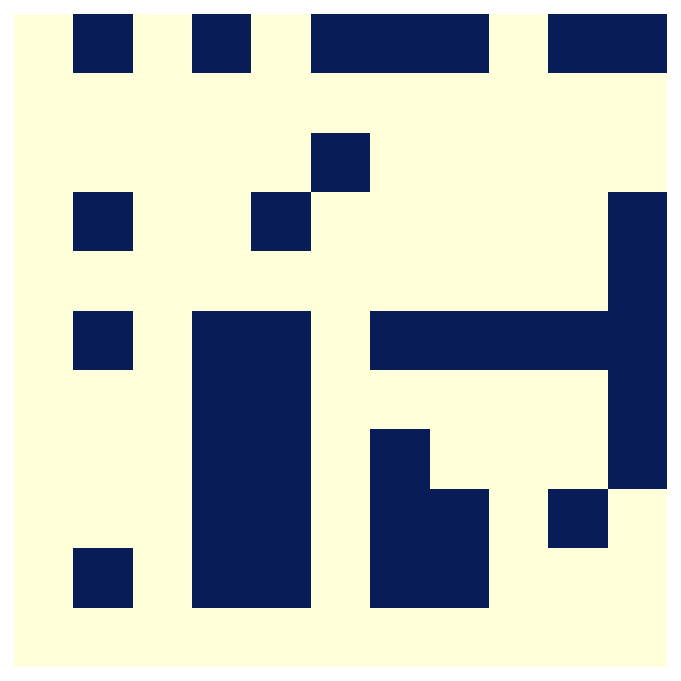

In [177]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
m = MatrixPlot(G)
m.draw()


We can also use an array function from numpy to make an array of the graph instead of a matrix plot.

In [182]:
A1 = nx.to_numpy_array(G, nodelist=sorted(G.nodes()))
A1

array([[0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# if time, check out 

# https://python.quantecon.org/sir_model.html

# https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/